
# Augmented Lagrangian (AuLa) method
1. https://kitchingroup.cheme.cmu.edu/blog/2013/02/03/Using-Lagrange-multipliers-in-optimization/

2. https://en.wikipedia.org/wiki/Augmented_Lagrangian_method

3. https://neos-guide.org/guide/algorithms/augmented-lagrangian/

The Augmented Lagrangian (AuLa) method is a class of algorithms used to solve constrained optimization problems. It is also known as the method of multipliers and has similarities to penalty methods. The method replaces a constrained optimization problem with a sequence of unconstrained subproblems, seeking a solution by introducing explicit Lagrangian multiplier estimates at each step.

.The AuLa method is useful for solving problems with equality and inequality constraints. It was originally called the method of multipliers for handling equality constraints and was later extended to handle inequality constraints. The method has been applied in various fields, including total variation denoising, compressed sensing, and computational mechanics
.The main steps of the AuLa method are as follows:

- Choose initial values for the primal variables, dual variables, and penalty parameter.
- Update the primal variables by minimizing the augmented Lagrangian function with respect to the primal variables, while keeping the dual variables and penalty parameter fixed.
- Update the dual variables by adding a multiple of the constraint violation to the current dual variables, while keeping the primal variables and penalty parameter fixed.
- Update the penalty parameter by increasing it if the constraint violation is not sufficiently small, or decreasing it if the constraint violation is sufficiently small.
- Repeat steps 2-4 until convergence is achieved, i.e., the primal and dual variables satisfy the KKT conditions and the constraint violation is sufficiently small

Here is a pseudo code for the Augmented Lagrangian (AuLa) method:
```
1. Choose initial values for the primal variables x, dual variables λ, and penalty parameter ρ
2. Set the iteration counter k = 0
3. While the stopping criterion is not satisfied do the following:
    a. Solve the subproblem for x:
        x(k+1) = argmin { L(x, λ(k), ρ) }
    b. Update the dual variables:
        λ(k+1) = λ(k) + ρ * g(x(k+1))
    c. Update the penalty parameter:
        ρ(k+1) = ρ(k) * update_rule
    d. Increment the iteration counter:
        k = k + 1
4. Return the final solution x(k)

Where:
- L(x, λ, ρ) is the augmented Lagrangian function
- g(x) is the gradient of the constraint function
- The update_rule can be a constant value or a more sophisticated rule to adjust the penalty parameter at each iteration
- The stopping criterion can be based on the convergence of the primal and dual variables, or a maximum number of iterations

```

## Example Augmented Lagrangian (AuLa) method

Suppose we seek to maximize the function $f(x,y)=x+y$ subject to the constraint that $x^2+y^2=1$. The function we seek to maximize is an unbounded plane, while the constraint is a unit circle. We want the maximum value of the circle, on the plane. We plot these two functions here. 

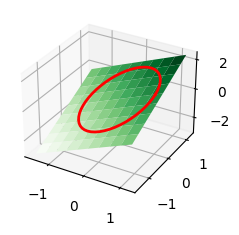

In [40]:

import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


plt.style.use('_mpl-gallery')
x = np.arange(-1.5, 1.5, 0.3)
[X, Y] = np.meshgrid(x, x, sparse ="True")

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.plot_surface(X, Y, X + Y, cmap=cm.Greens)

theta = np.linspace(0,2*np.pi);
R = 1.0
x1 = R * np.cos(theta)
y1 = R * np.sin(theta)

ax.plot(x1, y1, x1 + y1, 'r-',linewidth=2)
plt.show()



## 1. Construct the Lagrange multiplier augmented function.  
To find the maximum, we construct the following function: $Λ(x,y;λ)=f(x,y)+λg(x,y)$ where $g(x,y)=x^2+y^2−1=0$, which is the constraint function. Since $g(x,y)=0$, we are not really changing the original function, provided that the constraint is met! 

In [41]:
import numpy as np

def func(X):
    x = X[0]
    y = X[1]
    L = X[2] # this is the multiplier. lambda is a reserved keyword in python
    return x + y + L * (x**2 + y**2 - 1)

## 2. Finding the partial derivatives
The minima/maxima of the augmented function are located where all of the partial derivatives of the augmented function are equal to zero, i.e. $∂Λ/∂x=0, ∂Λ/∂y=0$, and $∂Λ/∂λ=0$

. the process for solving this is usually to analytically evaluate the partial derivatives, and then solve the unconstrained resulting equations, which may be nonlinear.

Rather than perform the analytical differentiation, here we develop a way to numerically approximate the partial derivatives. 

In [42]:
def dfunc(X):
    dLambda = np.zeros(len(X))
    h = 1e-3 # this is the step size used in the finite difference.
    for i in range(len(X)):
        dX = np.zeros(len(X))
        dX[i] = h
        dLambda[i] = (func(X+dX)-func(X-dX))/(2*h);
    return dLambda


## 3. Now we solve for the zeros in the partial derivatives

The function we defined above (dfunc) will equal zero at a maximum or minimum. It turns out there are two solutions to this problem, but only one of them is the maximum value. Which solution you get depends on the initial guess provided to the solver. Here we have to use some judgement to identify the maximum. 

In [43]:
from scipy.optimize import fsolve

# this is the max
X1 = fsolve(dfunc, [1, 1, 0])
print(X1, func(X1))

# this is the min
X2 = fsolve(dfunc, [-1, -1, 0])
print(X2, func(X2))

[ 0.70710678  0.70710678 -0.70710678] 1.4142135623730951
[-0.70710678 -0.70710678  0.70710678] -1.414213562373095


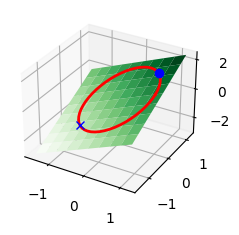

In [45]:
plt.style.use('_mpl-gallery')
x = np.arange(-1.5, 1.5, 0.3)
[X, Y] = np.meshgrid(x, x, sparse ="True")

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.plot_surface(X, Y, X + Y, cmap=cm.Greens)

theta = np.linspace(0,2*np.pi);
R = 1.0
x1 = R * np.cos(theta)
y1 = R * np.sin(theta)

ax.plot(x1, y1, x1 + y1, 'r-',linewidth=2)
# Maximum point
ax.plot(X1[0], X1[1], func(X1), 'o' , color="blue")
# Minimum point
ax.plot(X2[0], X2[1], func(X2), 'x', color="blue")
plt.show()